## Trajectory Prediction for NaN values

In [58]:
import pandas as pd

In [59]:
red_ball_fill = pd.read_csv('../test-data/red_ball_coordinates_128px_2024-02-27_11h29m.csv', delimiter=',', decimal='.')
red_ball_fill

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,0.0,42.0,87.0,39.0,NaN,NaN,44.0,83.0,89.0,83.0,NaN,NaN,69.0,122.0
1,0.5,42.5,87.0,40.0,NaN,NaN,45.0,84.0,89.0,84.0,NaN,NaN,68.5,120.5
2,0.5,43.5,87.0,41.0,NaN,NaN,45.0,85.0,89.0,85.0,NaN,NaN,68.5,120.5
3,1.0,45.0,87.5,42.0,NaN,NaN,45.0,86.0,89.0,86.0,NaN,NaN,68.5,120.5
4,1.0,45.5,88.0,43.0,NaN,NaN,45.0,86.0,90.0,87.0,NaN,NaN,68.5,120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,68.0,10.0,55.0,26.0,64.0,59.0,111.0,59.0,59.5,69.0,54.5,105.0,68.0,118.5
497,67.0,9.0,55.0,26.0,63.0,58.0,110.0,58.0,59.5,69.0,54.0,103.0,68.0,118.5
498,66.0,8.0,55.0,26.0,62.0,57.0,109.0,57.0,59.5,69.0,53.0,102.5,68.0,118.5
499,65.0,5.0,55.0,26.0,61.0,55.0,107.5,55.0,59.5,69.0,52.0,101.0,68.0,118.5


In [60]:
red_ball_nan_rows = red_ball_fill[red_ball_fill.u0.isna() & red_ball_fill.v0.isna()]
red_ball_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
132,NaN,NaN,55.0,25.5,52.0,48.0,98.0,48.0,59.5,69.5,42.0,94.0,68.0,118.5
133,NaN,NaN,55.0,25.5,50.0,47.0,96.5,47.0,59.5,69.5,41.0,93.0,68.0,118.5
134,NaN,NaN,55.0,23.5,49.0,47.0,95.0,47.0,59.5,69.5,40.0,93.0,68.0,118.5
135,NaN,NaN,55.0,23.5,48.0,46.0,94.0,46.5,59.5,69.5,38.0,92.5,68.0,118.5
136,NaN,NaN,55.0,23.5,46.0,46.0,92.0,46.0,59.5,69.5,37.0,92.0,68.0,118.5
137,NaN,NaN,55.0,23.5,45.0,46.0,90.5,46.0,59.5,69.5,35.0,92.0,68.0,118.5
138,NaN,NaN,55.0,23.5,43.0,45.0,89.0,46.0,59.5,69.5,34.0,91.0,68.0,118.5
139,NaN,NaN,55.0,23.5,42.0,45.0,87.0,46.0,59.5,69.5,32.0,91.0,68.0,118.5
140,NaN,NaN,55.0,23.5,40.0,45.0,86.0,46.0,59.5,69.5,30.0,91.0,68.0,118.5
141,NaN,NaN,55.0,23.5,38.5,45.0,84.0,46.0,59.5,69.5,29.0,91.0,68.0,118.5


In [61]:
red_ball_all = pd.read_csv('../data/red_ball_coordinates_128px_full.csv', delimiter=',', decimal='.')
red_ball_all_test = pd.read_csv('../test-data/red_ball_coordinates_128px_full.csv', delimiter=',', decimal='.')

In [62]:
red_ball_all = pd.concat([red_ball_all, red_ball_all_test])
red_ball_non_nan_rows = red_ball_all[~red_ball_all.index.isin(red_ball_nan_rows.index)]
# drop all the rows where u0 and v0 are NaN
red_ball_non_nan_rows = red_ball_non_nan_rows.dropna()
red_ball_non_nan_rows

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
95,65.714286,81.535714,106.952381,82.785714,55.0,23.5,68.411765,37.617647,55.000000,128.000000,59.0,69.0,68.500000,118.166667
96,66.312500,81.062500,106.972222,81.638889,55.0,23.5,68.235294,37.029412,54.727273,127.454545,59.0,69.0,68.500000,118.166667
97,66.250000,79.750000,107.400000,80.900000,55.0,23.5,68.750000,35.750000,55.347826,126.782609,59.0,69.0,68.500000,118.166667
98,66.411765,79.382353,108.255814,80.116279,55.0,23.5,68.750000,35.250000,55.928571,126.642857,59.0,69.0,68.500000,118.166667
99,66.625000,78.125000,108.581395,79.209302,55.0,23.5,69.470588,33.676471,56.542857,125.542857,59.0,69.0,68.428571,119.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130,5.500000,1.000000,114.500000,1.500000,4.0,55.0,61.000000,56.000000,120.000000,55.000000,1.0,112.0,124.000000,113.000000
4131,5.000000,2.000000,114.000000,2.000000,4.0,55.0,60.000000,56.000000,119.000000,55.000000,1.0,113.0,123.000000,113.000000
4132,5.000000,2.000000,114.000000,2.000000,4.0,56.0,60.000000,56.000000,119.000000,56.000000,0.0,113.0,123.000000,114.000000
4133,5.000000,2.000000,113.000000,2.000000,4.0,57.0,60.000000,57.000000,119.000000,57.000000,0.5,114.0,123.000000,114.000000


In [63]:
X_train = red_ball_non_nan_rows.drop(['u0', 'v0'], axis=1)
y_train = red_ball_non_nan_rows[['u0', 'v0']]
X_test = red_ball_nan_rows.drop(['u0', 'v0'], axis=1)

In [64]:
from sklearn.impute import KNNImputer

imputer_knn = KNNImputer(n_neighbors=2)
X_train_imputed = imputer_knn.fit_transform(X_train)
X_test_imputed = imputer_knn.transform(X_test)

In [65]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(X_test_imputed)
y_pred

array([[66.66292118, 20.07596404],
       [66.58048914, 20.17364251],
       [66.17724155, 18.81259349],
       [66.06773309, 18.64135216],
       [65.94398394, 19.03515054],
       [65.79315836, 19.16002913],
       [65.67650454, 19.19995343],
       [65.42677143, 19.33328287],
       [65.47133774, 19.54338667],
       [65.24514048, 19.72062913],
       [65.24146462, 19.8838949 ],
       [65.08821587, 20.11090039],
       [64.93739029, 20.23577899],
       [64.9758065 , 20.11502804],
       [70.05645241,  5.23249522],
       [69.98016051,  5.2427975 ],
       [69.73118384,  5.48087105],
       [69.55148182,  5.97730049],
       [69.32627265,  6.77489771],
       [68.87517858,  7.58464689],
       [52.34903478, 19.08970462],
       [52.43421953, 19.905938  ],
       [52.45185647, 20.24832965],
       [48.45197994, 23.07545071],
       [48.5513986 , 24.15457195],
       [49.10839055, 24.99995578],
       [50.59070857, 27.72746083],
       [50.8843953 , 28.38616281],
       [56.87523058,

In [68]:
# Replace NaN values in the original DataFrame
imputed_red_ball = red_ball_fill.copy()  # Create a copy to avoid modifying the original DataFrame directly
imputed_red_ball.loc[imputed_red_ball.u0.isna() & imputed_red_ball.v0.isna(), ['u0', 'v0']] = y_pred
# Display the modified DataFrame
imputed_red_ball

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,0.0,42.0,87.0,39.0,NaN,NaN,44.0,83.0,89.0,83.0,NaN,NaN,69.0,122.0
1,0.5,42.5,87.0,40.0,NaN,NaN,45.0,84.0,89.0,84.0,NaN,NaN,68.5,120.5
2,0.5,43.5,87.0,41.0,NaN,NaN,45.0,85.0,89.0,85.0,NaN,NaN,68.5,120.5
3,1.0,45.0,87.5,42.0,NaN,NaN,45.0,86.0,89.0,86.0,NaN,NaN,68.5,120.5
4,1.0,45.5,88.0,43.0,NaN,NaN,45.0,86.0,90.0,87.0,NaN,NaN,68.5,120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,68.0,10.0,55.0,26.0,64.0,59.0,111.0,59.0,59.5,69.0,54.5,105.0,68.0,118.5
497,67.0,9.0,55.0,26.0,63.0,58.0,110.0,58.0,59.5,69.0,54.0,103.0,68.0,118.5
498,66.0,8.0,55.0,26.0,62.0,57.0,109.0,57.0,59.5,69.0,53.0,102.5,68.0,118.5
499,65.0,5.0,55.0,26.0,61.0,55.0,107.5,55.0,59.5,69.0,52.0,101.0,68.0,118.5


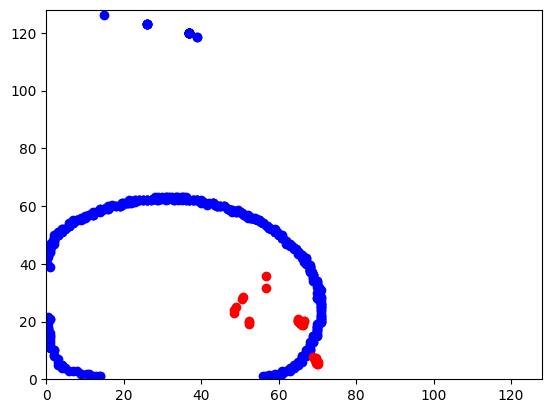

In [69]:
import matplotlib.pyplot as plt

# make a 2d plot with the old values in blue and the new in red
plt.scatter(red_ball_fill.u0[:800], red_ball_fill.v0[:800], color='blue')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color='red')
plt.xlim(0, 128)
plt.ylim(0, 128)
plt.show()


In [70]:
nan_order = red_ball_nan_rows.index.values
non_nan_order = red_ball_fill.index.values
len(nan_order), len(non_nan_order)

(39, 501)

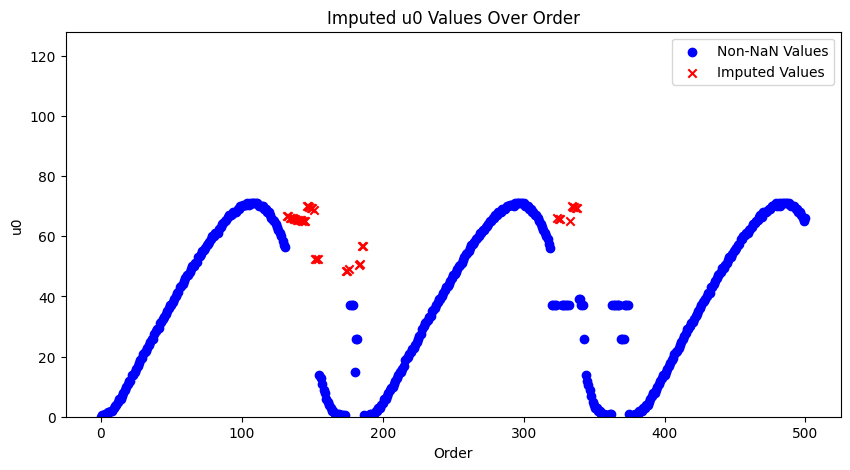

In [71]:
# Plotting u0 values over order
plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.u0, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred[:, 0], color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('u0')
plt.title('Imputed u0 Values Over Order')
plt.ylim(0, 128)
plt.legend()
plt.show()

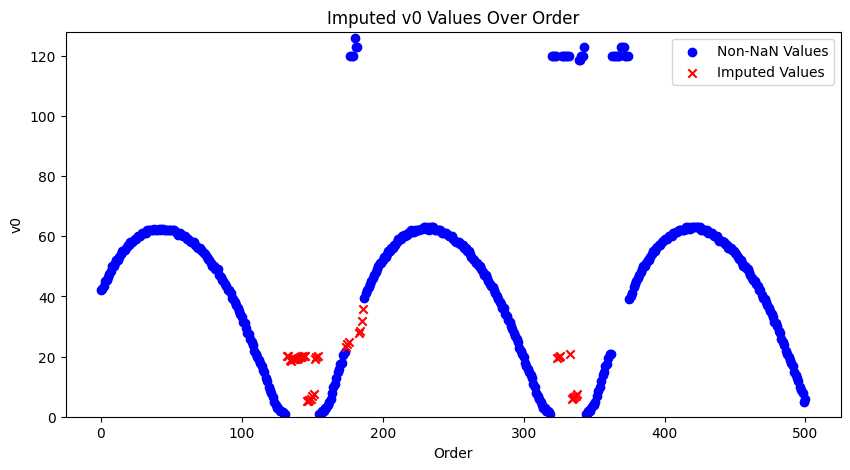

In [72]:
# Plotting v0 values over order
plt.figure(figsize=(10, 5))
plt.scatter(non_nan_order, red_ball_fill.v0, color='blue', label='Non-NaN Values')
plt.scatter(nan_order, y_pred[:, 1], color='red', marker='x', label='Imputed Values')
plt.xlabel('Order')
plt.ylabel('v0')
plt.title('Imputed v0 Values Over Order')
plt.ylim(0, 128)
plt.legend()
plt.show()